# Toolbox Inventory

## Feature Engineering

- One-hot encoding
- Content Knowledge Is Included

## Validation / Error Estimation

- Training v Testing
- Cross Validation
- Bootstrapping

## Pre-processing Tools

- Singular Value Decomospition, Principal Component Analysis

## Tools for Regression

- Linear Regression
- K-Nearest Neighbors for Regression
- Ridge Regression
- Lasso Regression

## Tools for Classification

- Logistic Regression
- K-Nearest Neighbors for Classification
- Linear and Quadratic Discriminant Analysis
- Support Vector Machines

# Decsion Trees, Boosting, and Random Forests


## Decsion Trees 

Today we will learn a new type of model, called *Decision Trees* and then explore a number of models using these algorithms. Decision trees represent a significant departure from previous models. Their primary advantage is that they produce models that are easy to explain to *non-experts* and they are also capable of distilling the most important features in a model.

However Decision Trees do not typically perform well on data as a model (again we see this sort of dichotomy between types of models), so we will also explore some techniques for using multiple decision trees as a model. These will have improved performance as models but will not be as easy to interpret.

Decsision Trees are especially important models in my work on Student Success as they represent the actual placement process we use at universities to determine what mathematics course students should take and what supports they need. [Here is an example of our placement chart at UNC.](https://www.unco.edu/nhs/mathematical-sciences/placement/results.aspx) You will see very quickly that this is a basic example of a decision tree. With that in mind you can see that they appear in many other places, though perhaps as models that have not been developed algorithmicly, trained on data, or tested.

Perhaps the best place to start is with an example:

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolor
import numpy as np

In [2]:
mpg = pa.read_csv('Data Sets/auto-mpg.csv', names=['mpg', 'cylinders', 'displacement', 'horsepower', 
                                                   'weight', 'acceleration', 'model year', 'origin', 'car name'])
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"\t""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"\t""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"\t""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"\t""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"\t""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"\t""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"\t""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"\t""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"\t""amc ambassador dpl"""


In [3]:
mpg = mpg[mpg.horsepower!='?']
mpg.horsepower = mpg.horsepower.astype('int')

In [4]:
X = np.array(mpg[['horsepower', 'weight']])
y = np.array(mpg['mpg'])

In [5]:
import numpy.random as rn

One note here:  I've realized that we probably should be using a different permutation for each run even across multiple models so for this class I have moved the training/testing set division inside of the plot command. This also means that the fit for the model is in there as well. The function now returns the fitted model. 

In [6]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Check how the existing regression algorithms from our toolbox do on this data:

In [7]:
from sklearn.linear_model import LinearRegression

Training R2: 0.70118449935619
Testing R2: 0.716860085856458


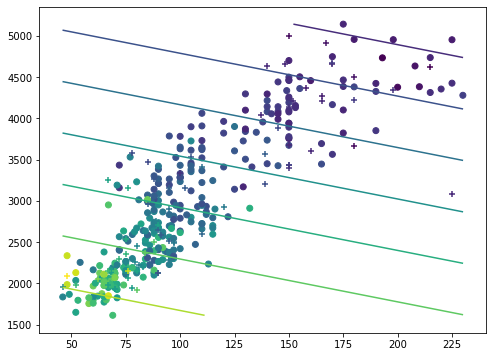

In [8]:
reg = LinearRegression()
plot_reg_model(reg, X, y)
plt.savefig('14.1.png')

In [9]:
from sklearn.linear_model import Ridge

Training R2: 0.7147029632405579
Testing R2: 0.6722677751278134


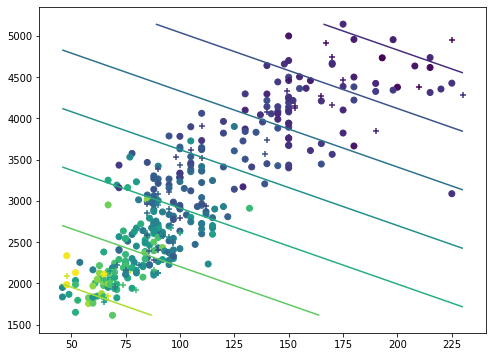

In [10]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y);
plt.savefig('14.2.png')

In [11]:
from sklearn.linear_model import Lasso

Training R2: 0.7100647795656119
Testing R2: 0.6928072131804728


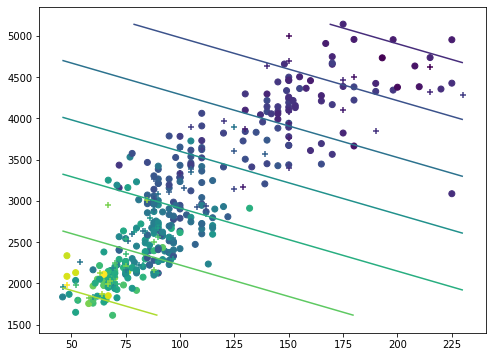

In [12]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y);
plt.savefig('14.3.png')

Interestingly we get slightly better performance from Lasso depsite only using two features.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.7348830043207226
Testing R2: 0.7014524541163439


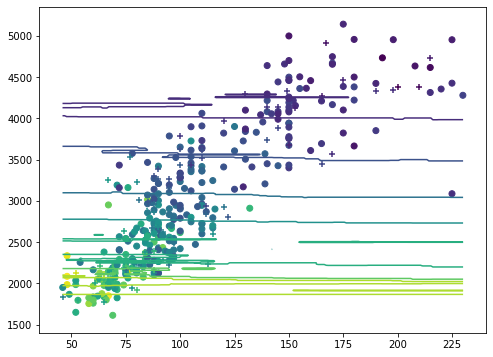

In [15]:
knn = KNeighborsRegressor(n_neighbors=13)
plot_reg_model(knn, X, y);
plt.savefig('14.4.png')

### Regression Trees

In [16]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.8397580080159721
Testing R2: 0.6234685624747387


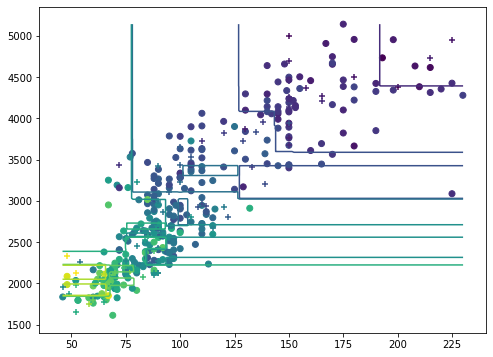

In [17]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y);
plt.savefig('14.5.png')

Below are two tricks for thinking about and visualizing Decision Trees. This first is representing it as the actual tree or decision process. The idea is that starting at the top you follow the rules for a particular datapoint until you reach a leaf. The value you assign from the model in each leaf is the mean of the results that are there.

The Tree has been built by choosing a split at each point that decreases the Mean Squared Error on the training data in that node (though the objective function can be modified). This tree picture then explains what we are seeing in the contour plot. The region is being divided into rectangular regions and then the value of the result is being estimated by the mean in each region of the training data.

The *min_samples_leaf* parameter sets the model to reject any split of a node that would result in fewer than five samples in one of the leaves. This helps smooth the result (and gives a contour plot that is a little cleaerer for this example. Particularly with regression this parameter will help avoid overfitting the tree. 

Note that the model, while it performed well on the training data did not perform well on the testing data compared with the other models we have for regression.

In [18]:
from sklearn.tree import export_graphviz
import graphviz

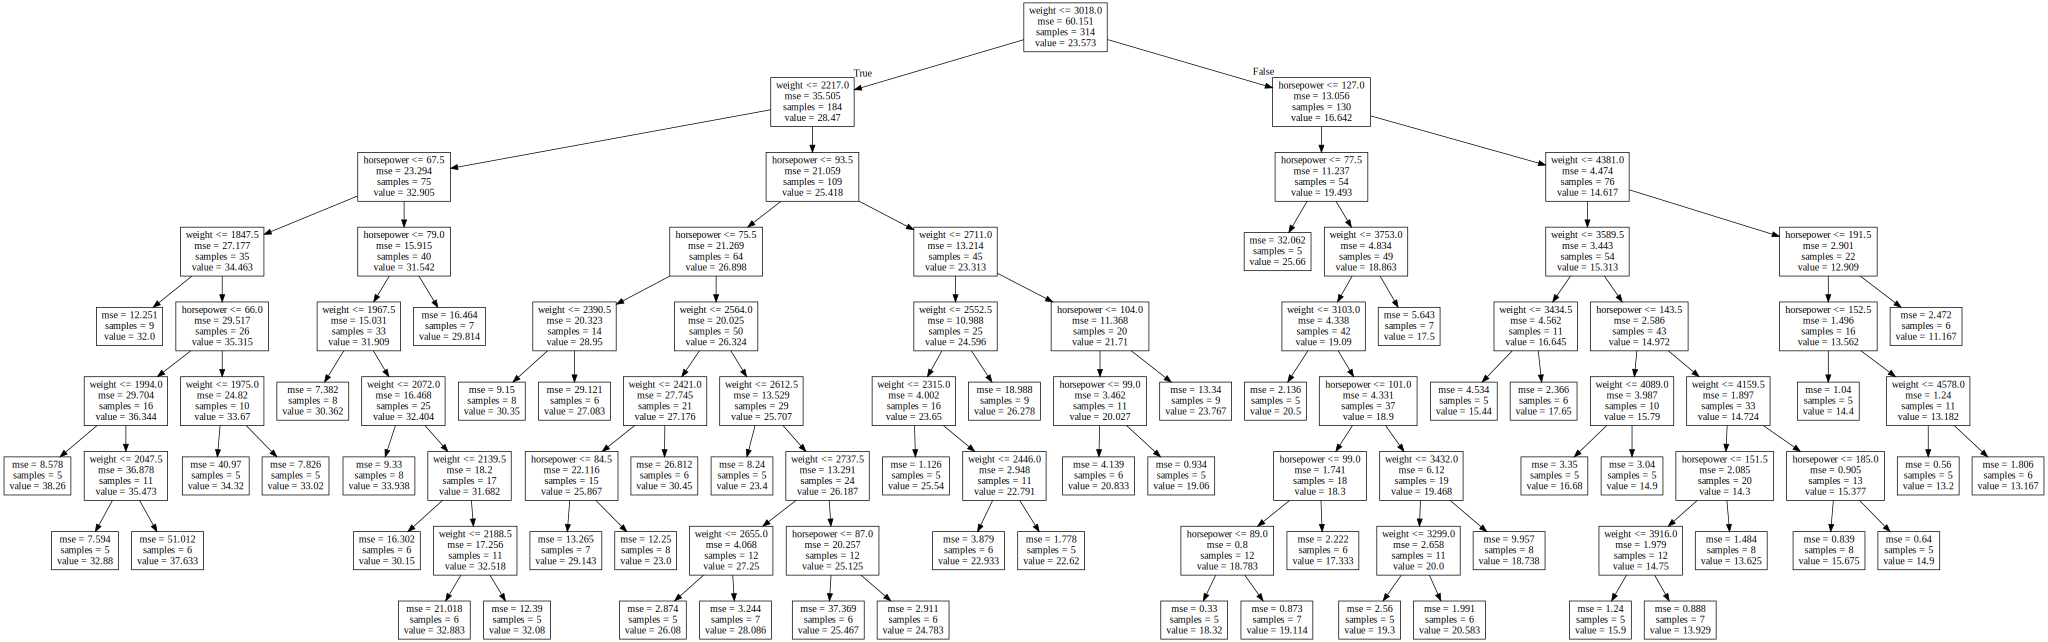

In [19]:
export_graphviz(tree, out_file='tree-1.dot', feature_names=['horsepower', 'weight'])

with open('tree-1.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

### Classification Tree

We can use the same idea for classification. We will choose the value or class of a leaf to the be the majority of its members in the training data. We split nodes that will improve the percentage of the training data that is being correctly classified.

In [20]:
# Read in the major league players data set

major = pa.read_csv('Data Sets/Major League Height-Weight.csv')   # creates a pandas Dataframe from a .csv file
major = major.rename({'Height(inches)':'Height', 'Weight(pounds)':'Weight'}, axis=1)  
major = major.drop(640, axis=0) 

# We are going to make a dictionary of key:value pairs to recode the Position feature to 
# 'Pitcher' and 'Not Pitcher'

pos_dict = {x:1 for x in list(set(major.Position)) if 'Pitcher' in x}
pos_dict2 = {x:0 for x in list(set(major.Position)) if not 'Pitcher' in x}

# Using dictionary comprehensions

pos_dict.update(pos_dict2) # merge the two dictionaries

major_2 = major.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to major_2 will change major
    
major_2.Position = major_2.Position.map(pos_dict)  # use the dictionary we made to recode the values with .map()

major_2.head()

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,0,72,210.0,35.43
4,Chris_Gomez,BAL,0,73,188.0,35.71


In [21]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and two values for the result
# Also prints out the training and testing errors

def plot_cat_model(clf, X, y):
 
    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model

    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),
        np.linspace(y_min, y_max, nn))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [22]:
X = np.array(major_2[['Height', 'Weight']])
y = np.array(major_2['Position'])

In [23]:
import matplotlib.colors as pltco
from sklearn.tree import DecisionTreeClassifier

Training Error: 0.7255139056831923
Testing Error: 0.6504854368932039


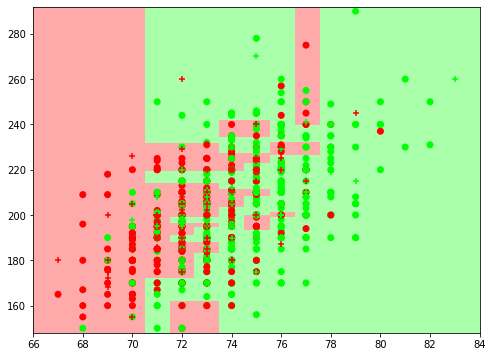

In [24]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
plot_cat_model(tree, X, y)
plt.savefig('14.6.png')

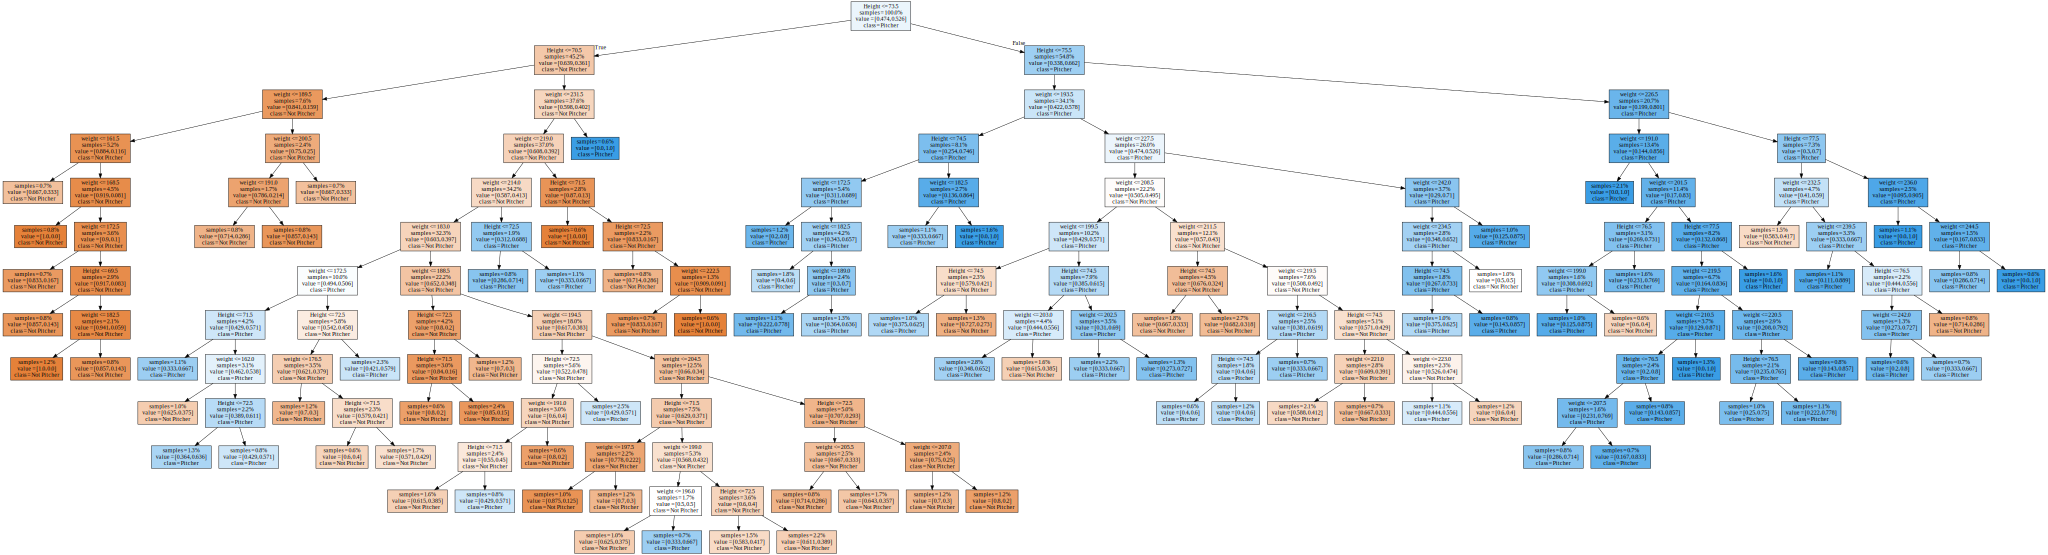

In [25]:
export_graphviz(tree, out_file='tree-2.dot', class_names = ['Not Pitcher', 'Pitcher'], feature_names=['Height', 'weight'], 
               impurity=False, proportion=True, filled=True)

with open('tree-2.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

### High Dimensional Data and Decision Trees

Decision trees are especially useful when using many features as they allow us to visualize the algorithm without having to graph it. Here is the house pricing data with a decision tree applied.

In [26]:
# Consider the following dataset about homes that sold in a city in Iowa

hd = pa.read_csv('Data Sets/house-prices/train.csv')

hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
def onehot(df, feature):
    '''A function to do one-hot-encoding of a feature from a dataframe. df = dataframe'''

    v = list(set(df[feature])) # Make an iterable of the unique values for the feature
    
    for c in df.index: # cycle through the samples
        t = df.loc[c, feature]
        
        for test in v:
            if pa.isna(test):  # nan values are sort of a problem and have to be handled separately
                if pa.isna(t):
                    df.loc[c, '{}_nan'.format(feature)] = 1
                else:
                    df.loc[c, '{}_nan'.format(feature)] = 0
            else:
                if t == test:
                    df.loc[c, '{}_{}'.format(feature, test)] = 1  # Makes a new feature with name feature_value
                                                              # and codes it as a 1 if that was the value
                else:
                    df.loc[c, '{}_{}'.format(feature, test)] = 0  # and 0 otherwise
            
    return df.drop(feature, axis=1) # returns a dataframe with the encoded feature removed

In [28]:
# We can recode it using a dictionary and .map()
Street_dict = {'Grvl':0, 'Pave':1, 0:0, 1:1}  
# Note we include the trivial coding of the new values as otherwise if we run this twice
# it produces NaN values for the Street feature.
hd.Street = hd.Street.map(Street_dict)
set(hd.Street)

{0, 1}

In [29]:
hd2 = onehot(hd, 'Alley')
hd3 = onehot(onehot(onehot(hd2, 'ExterQual'), 'LotShape'), 'LandContour')
hd3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,...,ExterQual_Ex,ExterQual_Gd,LotShape_Reg,LotShape_IR2,LotShape_IR1,LotShape_IR3,LandContour_Lvl,LandContour_HLS,LandContour_Bnk,LandContour_Low
0,1,60,RL,65.0,8450,1,AllPub,Inside,Gtl,CollgCr,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,1,AllPub,FR2,Gtl,Veenker,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,1,AllPub,Inside,Gtl,CollgCr,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,1,AllPub,Corner,Gtl,Crawfor,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,60,RL,84.0,14260,1,AllPub,FR2,Gtl,NoRidge,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
Utilities_dict = {'AllPub':1, 'NoSeWa':0, 1:1, 0:0}
hd3.Utilities = hd3.Utilities.map(Utilities_dict)
hd3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,...,ExterQual_Ex,ExterQual_Gd,LotShape_Reg,LotShape_IR2,LotShape_IR1,LotShape_IR3,LandContour_Lvl,LandContour_HLS,LandContour_Bnk,LandContour_Low
0,1,60,RL,65.0,8450,1,1,Inside,Gtl,CollgCr,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,1,1,FR2,Gtl,Veenker,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,1,1,Inside,Gtl,CollgCr,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,1,1,Corner,Gtl,Crawfor,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,60,RL,84.0,14260,1,1,FR2,Gtl,NoRidge,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [31]:
hd4 = onehot(onehot(onehot(onehot(hd3, 'LotConfig'), 'LandSlope'), 'Neighborhood'), 'MSZoning')
hd4.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Condition1,Condition2,BldgType,HouseStyle,...,Neighborhood_Gilbert,Neighborhood_NoRidge,Neighborhood_ClearCr,Neighborhood_IDOTRR,Neighborhood_Somerst,MSZoning_RL,MSZoning_FV,MSZoning_RM,MSZoning_C (all),MSZoning_RH
0,1,60,65.0,8450,1,1,Norm,Norm,1Fam,2Story,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20,80.0,9600,1,1,Feedr,Norm,1Fam,1Story,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,1,1,Norm,Norm,1Fam,2Story,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,70,60.0,9550,1,1,Norm,Norm,1Fam,2Story,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,1,1,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
def condition(df, feature1, feature2):
    
    #This is onehot encoding but for features that represent the same things 
    # - i.e. where a sample could have two values identified.
    
    v = set(list(set(df[feature1])) + list(set(df[feature2])))  # Build a list of the possible outputs
    
    for c in df.index: # cycle through the samples
        t1 = df.loc[c, feature1]
        t2 = df.loc[c, feature2]
        
        for test in v:
            if (t1==test) or (t2==test):
                df.loc[c, '{}_{}'.format(feature1, test)] = 1  # Makes a new feature with name feature_value
                                                            # and codes it as a 1 if that was the value
            else:
                df.loc[c, '{}_{}'.format(feature1, test)] = 0  # and 0 otherwise
            
    return df.drop([feature1, feature2], axis=1) # returns a dataframe with the encoded feature removed

In [33]:
hd5 = condition(hd4, 'Condition1', 'Condition2')
hd5.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,...,MSZoning_RH,Condition1_RRAn,Condition1_RRNn,Condition1_PosN,Condition1_RRNe,Condition1_Feedr,Condition1_RRAe,Condition1_Norm,Condition1_PosA,Condition1_Artery
0,1,60,65.0,8450,1,1,1Fam,2Story,7,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,20,80.0,9600,1,1,1Fam,1Story,6,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,60,68.0,11250,1,1,1Fam,2Story,7,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,70,60.0,9550,1,1,1Fam,2Story,7,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,60,84.0,14260,1,1,1Fam,2Story,8,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
hd6 = onehot(onehot(onehot(onehot(hd5, 'BldgType'), 'HouseStyle'), 'RoofStyle'), 'RoofMatl')
hd6.iloc[:5, 9:]

,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,...,RoofStyle_Mansard,RoofStyle_Hip,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_ClyTile,RoofMatl_Metal,RoofMatl_Tar&Grv
0,2003,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,Gd,TA,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,TA,Gd,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,VinylSd,VinylSd,BrkFace,162.0,TA,PConc,Gd,TA,Mn,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,Gd,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,VinylSd,VinylSd,BrkFace,350.0,TA,PConc,Gd,TA,Av,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Probably enough, lets make a list of all of the features that are not 'object'
# (i.e. that are numerical)

keep = hd6.columns[hd6.dtypes!='object'][1:]
keep

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'RoofStyle_Mansard', 'RoofStyle_Hip', 'RoofMatl_CompShg',
       'RoofMatl_WdShngl', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_WdShake', 'RoofMatl_ClyTile', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv'],
      dtype='object', length=128)

In [36]:
# Check for NaN

for v in keep:
    if sum(np.isnan(hd6[v]))!=0:
        print(v)

LotFrontage
MasVnrArea
GarageYrBlt


In [37]:
# MasVnrArea and GarageYrBlt that are NaN probably mean 0 (i.e. no Garage and no Masonry)

for k in hd6.index:
    if np.isnan(hd6.loc[k, 'MasVnrArea']):
        hd6.loc[k, 'MasVnrArea']=0
    if np.isnan(hd6.loc[k, 'GarageYrBlt']):
        hd6.loc[k, 'GarageYrBlt']=0


In [38]:
keep = list(hd6.columns[hd6.dtypes!='object'][1:])
keep.remove('LotFrontage')   # There are some NaNs in LotFrontage. We could try to fill them in with a regression.
                             # Or we might check with a content expert and see if they should be 0
hd7 = hd6.loc[:, keep]
hd7.head()

,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,RoofStyle_Mansard,RoofStyle_Hip,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_ClyTile,RoofMatl_Metal,RoofMatl_Tar&Grv
0,60,8450,1,1,7,5,2003,2003,196.0,706,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,9600,1,1,6,8,1976,1976,0.0,978,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,1,1,7,5,2001,2002,162.0,486,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,9550,1,1,7,5,1915,1970,0.0,216,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,1,1,8,5,2000,2000,350.0,655,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Convert them to Numpy Arrays X for predictors and y for result

keep.remove('SalePrice')
X = np.array(hd7.loc[:, keep])
y = np.array(hd7.loc[:, 'SalePrice'])

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [40]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9361980086145864, 0.8117269631515491)

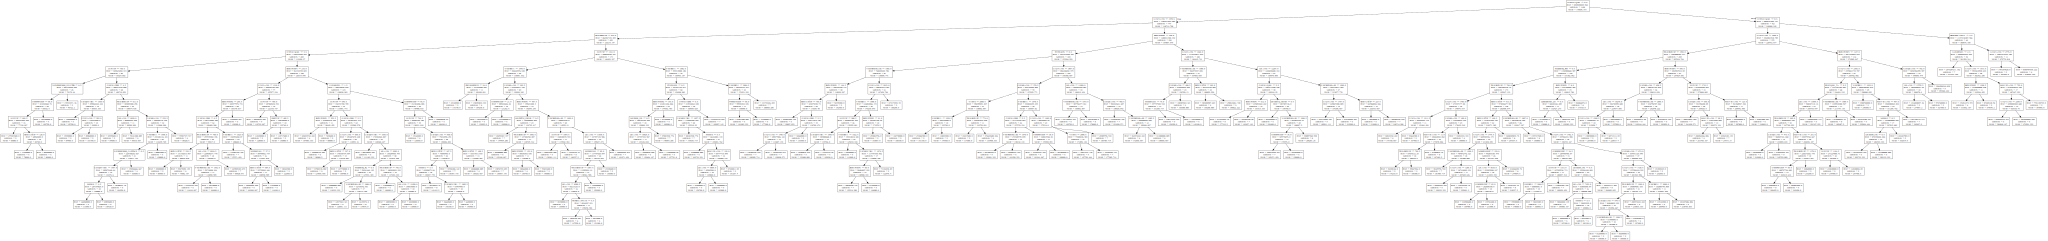

In [41]:
export_graphviz(tree, out_file='tree-3.dot', feature_names=keep)

with open('tree-3.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

One of the big uses I have found for decsion trees and related algorithms is in helping to identify features that are important in the regression or classification. Here is a short code snippet for producing a graph of the features by importance.

In [42]:
def plot_feature_importances(model, names, tol=10**-3):
    n_features = len(names)
    plot_names = []
    plot_importances = []
    
    for k in range(n_features):
        if model.feature_importances_[k] > tol:
            plot_names += [ names[k] ]
            plot_importances += [ model.feature_importances_[k] ]
    
    n_plot = len(plot_names)
    
    plt.figure(figsize = (10, 6))
    plt.barh(range(n_plot), plot_importances, align = 'center')
    plt.yticks(np.arange(n_plot), plot_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_plot)

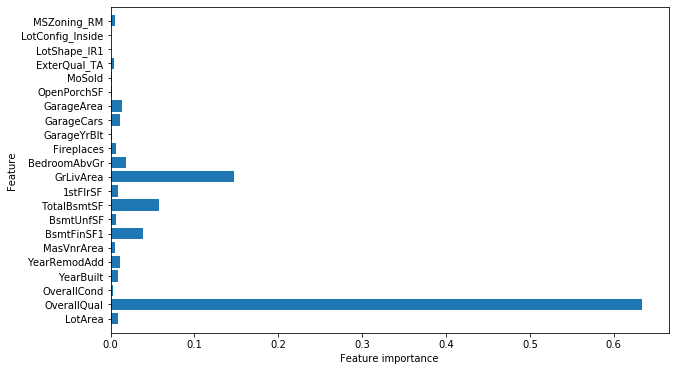

In [43]:
plot_feature_importances(tree, keep)
plt.savefig('14.7.png')

For this model, we see that most features ended up being unimportant. It suggests it would be worth retaining the model using only the ones that were captured as important.

In [44]:

C, B, A = np.sort(tree.feature_importances_)[-3:] 
# numpy.sort is a convenient way to get the smallest values (or largest values) from an array
d1, d2, d3 = (np.where(tree.feature_importances_==A)[0][0], np.where(tree.feature_importances_==B)[0][0], 
              np.where(tree.feature_importances_==C)[0][0])
# nump.where(s==A) tells us for which index s gives A.
# we should automate the process of checking that they are far apart from each other, 
# however given the shape of the graph, I am confident they will be.

keep[d1], keep[d2], keep[d3]

('OverallQual', 'GrLivArea', 'TotalBsmtSF')

### Discussion of Decision Tree Algorithms

Those of you taking the *Graph Theory Course* or the *Algorithms Course* have seen trees before. Note that the decision trees here are a subset of the trees you could build by dividing the samples by splitting until you reach leaves with less than 10 nodes. The subset is much smaller because the splitting has to preserve samples that are close in the feature coordinates being used, however for even a moderatley big dataset it will still be to large to effectively search all possible decision trees for the one that performs the best.

So how does the algorithm find the tree from the training data?  It does two tricks to improve the speed over the naive pure search. First we will use a *Greedy* algorithm to grow the tree from one node to several. The second trick is needed if the number of features is large, as this also affects the number of choices the algorithm will have. So instead of considering the best split from all possible features, the algorithm at each step will take a random subset of the features and determine the best split from them.

A *Greedy* algorithm is one that makes the best choice for the next step. It is Greedy in the sense that it might overlook choices for the split at the current step that would lead to a better tree later in the process.  In the *Algorithms Course* you saw a number of *Greedy* algorithms in the context of problems that required us to search trees and graphs, the classic one being the Traveling Salesmen problem. The *Greedy* solution to the traveling salesmen problem chooses for its next trip the cheapest (or shortest) edge from its current node.

We can get a sense of how a Decision Tree grows by restricting the number of levels (height) with the *max_depth* parameter and setting the random seed with *random_state*. We need to set the random seed because otherwise the randomness in the algorithm will generate a different tree each time.

In [45]:
tree = DecisionTreeRegressor(min_samples_leaf=5, max_depth=1, random_state=123)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.4316972232851464, 0.4309474137060595)

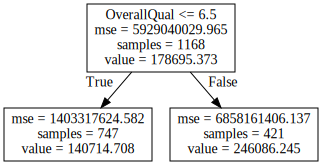

In [46]:
export_graphviz(tree, out_file='tree-4.dot', feature_names=keep)

with open('tree-4.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

In [47]:
tree = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2, random_state=123)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.6258346848095737, 0.5893025613900711)

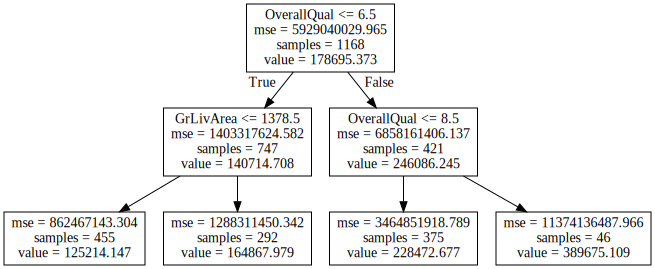

In [48]:
export_graphviz(tree, out_file='tree-5.dot', feature_names=keep)

with open('tree-5.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

In [49]:
tree = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3, random_state=123)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.7216531085516, 0.6833275292910836)

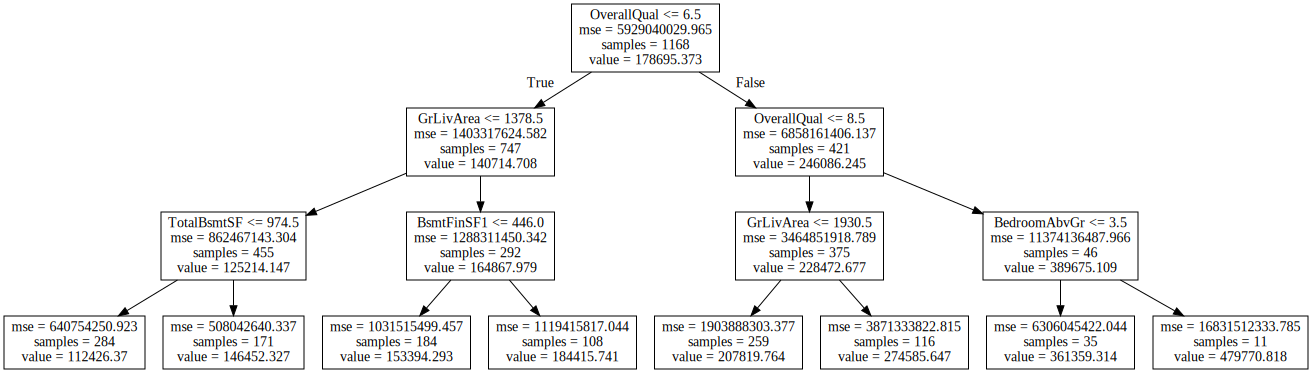

In [50]:
export_graphviz(tree, out_file='tree-6.dot', feature_names=keep)

with open('tree-6.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

Or in the case of classification.

In [51]:
X = np.array(major_2[['Height', 'Weight']])
y = np.array(major_2['Position'])

Training Error: 0.6662636033857315
Testing Error: 0.5970873786407767


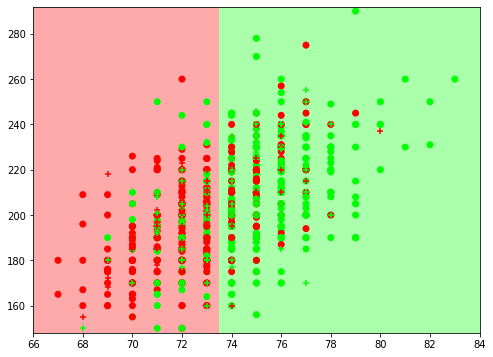

In [52]:
tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=1, random_state=123)
plot_cat_model(tree, X, y)
plt.savefig('14.8.png')

Training Error: 0.652962515114873
Testing Error: 0.6504854368932039


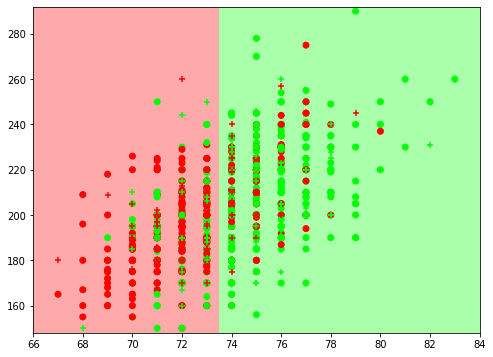

In [53]:
tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=2, random_state=123)
plot_cat_model(tree, X, y)
plt.savefig('14.9.png')

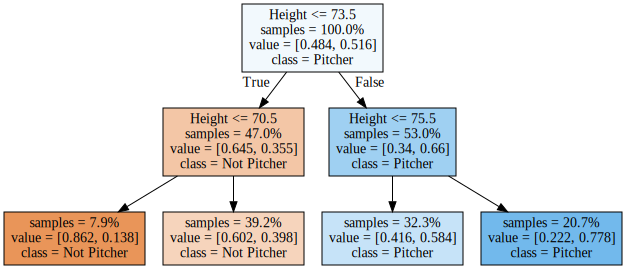

In [54]:
export_graphviz(tree, out_file='tree-7.dot', class_names = ['Not Pitcher', 'Pitcher'], feature_names=['Height', 'weight'], 
               impurity=False, proportion=True, filled=True)

with open('tree-7.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

This turns out to be a nice example, because notice at this level the splits it has selected did not actually change the prediction, but what they did do was improve the quality of some of the classes. There are different objective functions one could use for this splitting, they are listed as defaults in the function help page.

Training Error: 0.6674727932285369
Testing Error: 0.6213592233009708


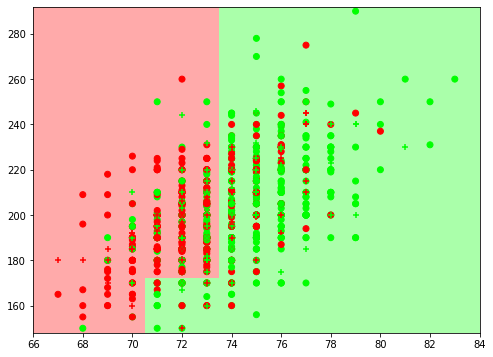

In [55]:
tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3, random_state=123)
plot_cat_model(tree, X, y)
plt.savefig('14.10.png')

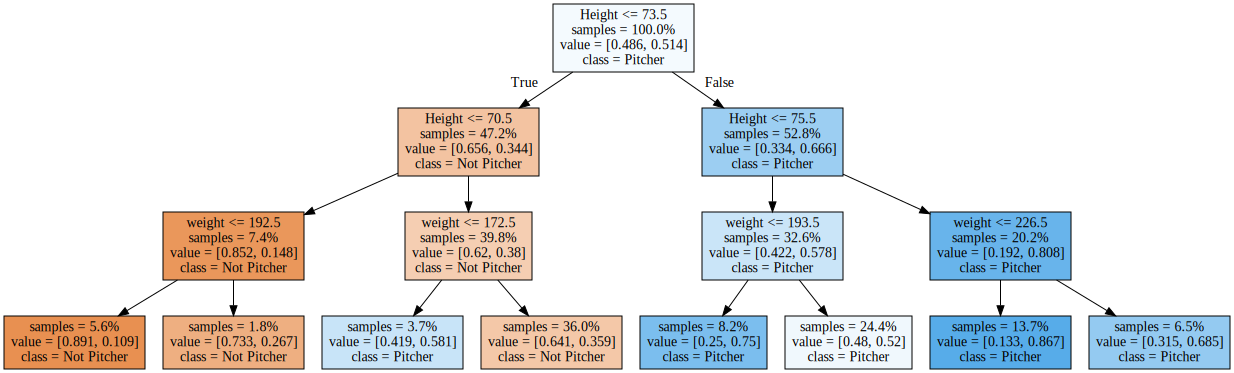

In [56]:
export_graphviz(tree, out_file='tree-8.dot', class_names = ['Not Pitcher', 'Pitcher'], feature_names=['Height', 'weight'], 
               impurity=False, proportion=True, filled=True)

with open('tree-8.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

Notice at this level only one subclass has appeared (and hence one new rectangle in the region plot.

## Extensions of Trees

While decision trees are nice in terms of explaining a result, they do not typically perform all that well on testing data. However a couple of generalizations will do a good job of helping decision trees relax on the training data and avoid overfitting which will improve performance on testing data. The result will be a loss of the interpretative power of the algorithm.

### Boosting

The first extension is called *Boosting*. Boosting applies successive trees to the errors between the current model and a subset of the training data. This is our first example of an *Ensemble* model that uses combinations (in the case of Boosting, linear combinations) of models. This results in models that have:

- a number of tuning parameters: giving us the ability to identify the best model for a dataset
- applying randomness to smooth out variations
- overall a model that retains some flexibility of the component models, but has also been smoothed.


In [183]:
from sklearn.ensemble import GradientBoostingRegressor

In [184]:
# Convert them to Numpy Arrays X for predictors and y for result

X = np.array(hd7.loc[:, keep])
y = np.array(hd7.loc[:, 'SalePrice'])

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [185]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
reg.fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.9669936852996642, 0.820635365251239)

Of course a big question becomes, what is the right choice of the various parameters. Let's use cross validation to choose the right value of *learning_rate*; note that the Ensemble method itself uses a form of bootstrapping/cross validation in that it trains the boosted trees at each step on a random sample of the training data.

In [186]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]

tests = 25
a = np.linspace(0.01, 0.5, tests)

names1 = [ 'train_{}'.format(x) for x in range(tests)]
names2 = [ 'test_{}'.format(x) for x in range(tests)]
names = []
for c in range(tests):
    names += [names1[c], names2[c]]


R2 = pa.DataFrame( np.array([ [0]*5 ]*2*tests).transpose(), columns = names)
# Making a DataFrame to record the R2 values in

for k in range(5):
    X_test = X[k*test:(k+1)*test]       # Then create the test
    y_test = y[k*test:(k+1)*test]
    X_train = np.concatenate( (X[:k*test], X[(k+1)*test:]), axis=0)     # and train sets
    y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)

    for c in range(tests):
        reg = GradientBoostingRegressor(n_estimators=100, learning_rate=a[c]).fit(X_train, y_train)
        R2.iloc[k, 2*c] = reg.score(X_train, y_train)
        R2.iloc[k, 2*c+1] = reg.score(X_test, y_test)

R2mean = [0]*2*tests
R2std = [0]*2*tests
for c in range(2*tests):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
R2

,train_0,test_0,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,...,train_20,test_20,train_21,test_21,train_22,test_22,train_23,test_23,train_24,test_24
0,0.707382,0.676637,0.922481,0.871304,0.950779,0.889662,0.960931,0.897842,0.965577,0.897137,...,0.991123,0.872184,0.991212,0.879069,0.993060,0.863578,0.992931,0.875422,0.992713,0.878765
1,0.707704,0.630357,0.921225,0.815680,0.951237,0.837151,0.960074,0.839635,0.966350,0.853936,...,0.991466,0.854575,0.991156,0.824914,0.991297,0.827704,0.991610,0.820427,0.992225,0.840474
2,0.697350,0.678079,0.915217,0.870622,0.947065,0.894926,0.957823,0.904107,0.963999,0.904733,...,0.990421,0.900892,0.990379,0.895271,0.990609,0.881612,0.991684,0.884510,0.991380,0.888234
3,0.704397,0.654268,0.918301,0.860254,0.948063,0.889828,0.957807,0.891822,0.963012,0.901399,...,0.990842,0.898286,0.991230,0.871729,0.991355,0.880042,0.992422,0.870430,0.992372,0.881311
4,0.707690,0.666489,0.920472,0.860037,0.949732,0.879365,0.957564,0.896262,0.963938,0.886416,...,0.990247,0.880887,0.991117,0.848389,0.991931,0.818972,0.992651,0.880965,0.992985,0.858681
Mean,0.704905,0.661166,0.919539,0.855579,0.949375,0.878186,0.958840,0.885934,0.964575,0.888724,...,0.990820,0.881365,0.991019,0.863874,0.991650,0.854381,0.992260,0.866351,0.992335,0.869493
Standard Deviation,0.003976,0.017610,0.002553,0.020529,0.001589,0.021131,0.001387,0.023482,0.001211,0.018457,...,0.000446,0.017145,0.000322,0.024642,0.000820,0.026268,0.000526,0.023457,0.000546,0.017526


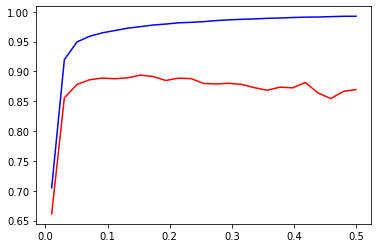

In [187]:
plt.plot(a, R2mean[::2], 'b-')
plt.plot(a, R2mean[1::2], 'r-')
plt.savefig('14.11.png')

Using this we make the best decsion we can from the experiments and then use the entire dataset to fit the model. We can then ask what were the important features used in the model.

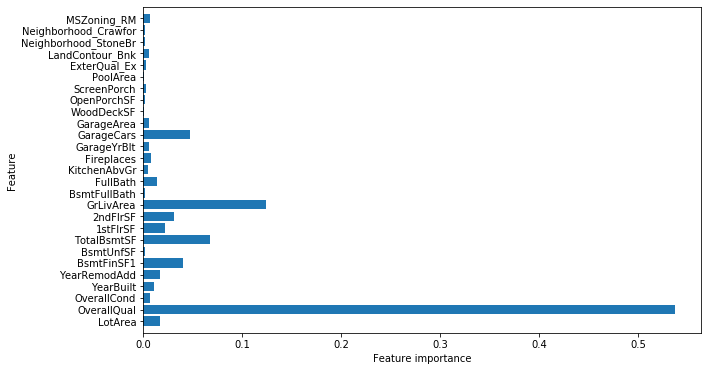

In [188]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate= 0.2).fit(X, y)
plot_feature_importances(reg, keep)
plt.savefig('14.12.png')

### Random Forests

In contrast to *Boosting* where the model is built sequentially, *Random Forests* are a type of Ensemble model where individual models are trained on samples of the training data, and are then allowed to vote to give a prediction. The weights of the votes are trained on the full set of training data. This again improves the predictive capability of *Decision Trees* by introducing randomness and some additional tuning parameters into the problem. 

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
X = np.array(major_2[['Height', 'Weight']])
y = np.array(major_2['Position'])

Training Error: 0.7678355501813785
Testing Error: 0.6019417475728155


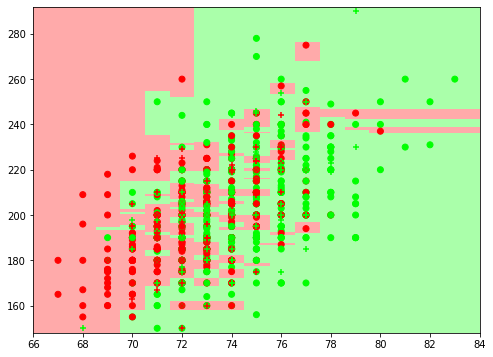

In [191]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1) 
plot_cat_model(clf, X, y)
plt.savefig('14.13.png')

Note that because the trees in the forest are built on random samples of the training data, they can be built simmultaneously. Thus the algorithm is parallizable, the *n_jobs* parameter specifics the number of cores to use and -1 means uses all available. The *Boosting* algorithms on the other hand build the next tree based on the results of the previous one and so are not parallizable.

Here we see some evidence of overfitting. To address this we need to adjust the parameters in the model. There is the *n_estimators* controlling the number of trees, and then there are the same parameters as for trees that control the size and behavior of the individual decision trees.

Training Error: 0.750906892382104
Testing Error: 0.6262135922330098


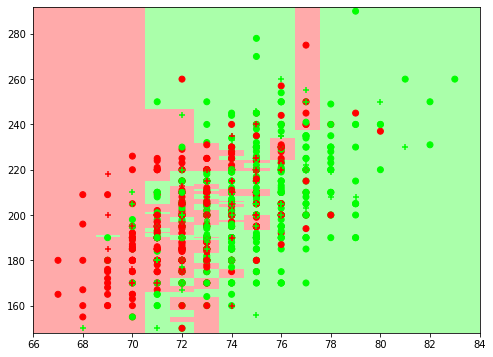

In [192]:
clf = RandomForestClassifier(n_estimators=20, min_samples_split=10, n_jobs=-1) 
plot_cat_model(clf, X, y)
plt.savefig('14.14.png')

Training Error: 0.6553808948004837
Testing Error: 0.6650485436893204


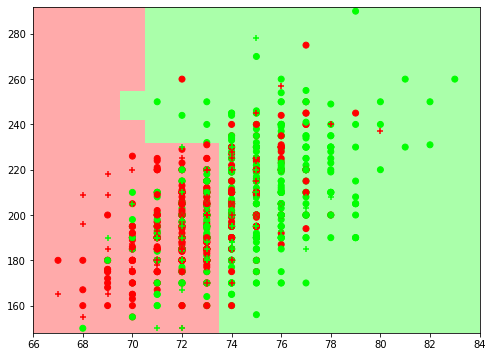

In [193]:
clf = RandomForestClassifier(n_estimators=50, max_depth=3, n_jobs=-1) 
plot_cat_model(clf, X, y)
plt.savefig('14.15.png')

### Another Classification Example with more Features

In [194]:
ab = pa.read_csv('Data Sets/Abalone/abalone.csv', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight',
                                                        'Viscera_Weight', 'Shell_Weight', 'Rings'])
ab.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [195]:
# One hot encoding for the 'Sex' feature

for k in ab.index:
    if ab.loc[k, 'Sex']=='M':
        ab.loc[k, 'Male']=1
    else: ab.loc[k, 'Male']=0
    if ab.loc[k, 'Sex']=='F':
        ab.loc[k, 'Female']=1
    else: ab.loc[k, 'Female']=0
    if ab.loc[k, 'Sex']=='I':
        ab.loc[k, 'Infant']=1
    else: ab.loc[k, 'Infant']=0
        
ab.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,0.0,0.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0,0.0,0.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0,1.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0,0.0,0.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,0.0,1.0


The classification problem into all ring values is hard. We can make it easier by classifying whether the number of rings is bigger than or less than the mean.

In [196]:
t = ab.Rings.mean()
for k in ab.index:
    if ab.loc[k, 'Rings'] < t:
        ab.loc[k, 'Age'] = 0
    else: ab.loc[k, 'Age'] = 1

In [197]:
keep = ['Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight', 
         'Viscera_Weight', 'Shell_Weight', 'Male', 'Female', 'Infant']
X = np.array( ab[ keep] )
y = np.array( ab['Age'])


In [198]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]

tests = 25
step = 5
a = np.arange(step, step*(tests+1), step)

names1 = [ 'train_{}'.format(x) for x in range(tests)]
names2 = [ 'test_{}'.format(x) for x in range(tests)]
names = []
for c in range(tests):
    names += [names1[c], names2[c]]


Score = pa.DataFrame( np.array([ [0]*5 ]*2*tests).transpose(), columns = names)
# Making a DataFrame to record the R2 values in

for k in range(5):
    X_test = X[k*test:(k+1)*test]       # Then create the test
    y_test = y[k*test:(k+1)*test]
    X_train = np.concatenate( (X[:k*test], X[(k+1)*test:]), axis=0)     # and train sets
    y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)

    for c in range(tests):
        clf = RandomForestClassifier(n_estimators = a[k], max_depth=5, n_jobs=-1).fit(X_train, y_train)
        Score.iloc[k, 2*c] = clf.score(X_train, y_train)
        Score.iloc[k, 2*c+1] = clf.score(X_test, y_test)

Score_mean = [0]*2*tests
Score_std = [0]*2*tests
for c in range(2*tests):
    Score_mean[c] = np.mean(Score.iloc[0:5, c])
    Score_std[c] = np.std(Score.iloc[0:5, c])
    
Score = Score.append( pa.Series(Score_mean, index=Score.columns), ignore_index=True )
Score = Score.append( pa.Series(Score_std, index=Score.columns), ignore_index=True)
Score.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
Score

,train_0,test_0,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,...,train_20,test_20,train_21,test_21,train_22,test_22,train_23,test_23,train_24,test_24
0,0.803112,0.797605,0.806104,0.783234,0.799521,0.800000,0.803112,0.801198,0.805506,0.795210,...,0.803411,0.792814,0.809695,0.791617,0.807002,0.779641,0.795931,0.792814,0.802513,0.789222
1,0.810592,0.777246,0.812089,0.779641,0.815081,0.774850,0.811490,0.768862,0.809096,0.768862,...,0.815380,0.759281,0.817774,0.773653,0.815380,0.761677,0.803112,0.759281,0.811789,0.768862
2,0.812388,0.800000,0.810293,0.785629,0.808797,0.797605,0.807600,0.786826,0.805506,0.784431,...,0.810293,0.797605,0.812687,0.792814,0.810892,0.782036,0.807899,0.789222,0.809695,0.788024
3,0.811490,0.805988,0.811490,0.802395,0.807002,0.797605,0.812986,0.805988,0.810892,0.797605,...,0.815380,0.810778,0.807301,0.803593,0.817175,0.807186,0.807002,0.802395,0.807600,0.801198
4,0.808797,0.782036,0.810293,0.767665,0.807899,0.773653,0.815380,0.772455,0.811490,0.774850,...,0.807899,0.780838,0.808199,0.782036,0.807002,0.774850,0.811789,0.779641,0.810592,0.778443
Mean,0.809276,0.792575,0.810054,0.783713,0.807660,0.788743,0.810114,0.787066,0.808498,0.784192,...,0.810473,0.788263,0.811131,0.788743,0.811490,0.781078,0.805147,0.784671,0.808438,0.785150
Standard Deviation,0.003303,0.011013,0.002094,0.011199,0.004962,0.011870,0.004318,0.014850,0.002567,0.011168,...,0.004576,0.017378,0.003792,0.010179,0.004198,0.014831,0.005371,0.014636,0.003264,0.010887


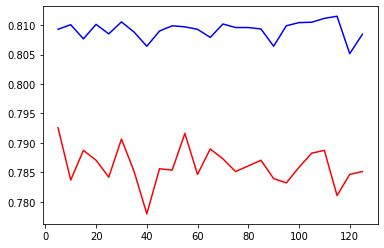

In [200]:
plt.plot(a, Score_mean[::2], 'b-')
plt.plot(a, Score_mean[1::2], 'r-');
plt.savefig('14.16.png')

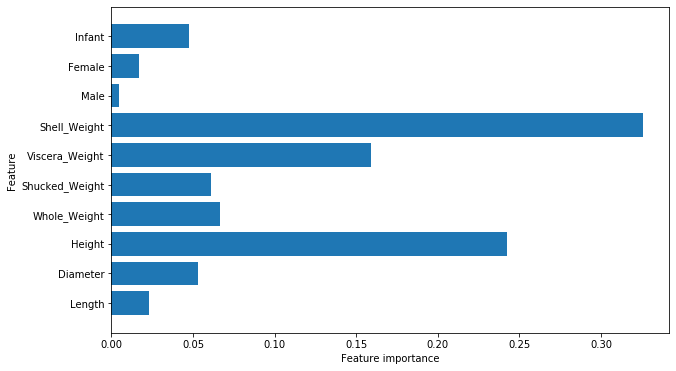

In [202]:
clf = RandomForestClassifier(n_estimators = 55, max_depth=5, n_jobs=-1).fit(X, y)
plot_feature_importances(clf, keep)
plt.savefig('14.17.png')